# Cancer Risk Factor Analysis

### Author: Jorge Montoya
### Domain: Healthcare
### Timeframe: Academic Project (Northeastern University)
### Date: December 2022
### Last Revision Date: January 2025
### Project Description:
##### This project looks to identify what are the risk factors for cancer mortality based on county level data from US by using machine learning algorithms.
#### Notes:
##### Last revision was made to add header information in this file prior to uploading to Github.

In [1]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import tree
import matplotlib.image as plting
import statsmodels.api as sm
from scipy import stats
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

## Data Ingestation

In [2]:
# Connecting to data source - excel file
df = pd.read_excel('Cancer Dataset.xlsx')

# Preview at the data
df.head()

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,MedianAgeMale,...,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,TARGET_deathRate
0,1397.0,469,489.8,61898,260131,11.2,499.748204,"(61494.5, 125635]",39.3,36.9,...,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831,164.9
1,173.0,70,411.6,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,32.2,...,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096,161.3
2,102.0,50,349.7,49348,21026,14.6,47.560164,"(48021.6, 51046.4]",45.0,44.0,...,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488,174.7
3,427.0,202,430.4,44243,75882,17.1,342.637253,"(42724.4, 45201]",42.8,42.2,...,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841,194.8
4,57.0,26,350.1,49955,10321,12.5,0.000000,"(48021.6, 51046.4]",48.3,47.8,...,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657,144.4


## Exploratory Data Analysis

In [5]:
df.isnull().sum()

avgAnnCount                   0
avgDeathsPerYear              0
incidenceRate                 0
medIncome                     0
popEst2015                    0
povertyPercent                0
studyPerCap                   0
binnedInc                     0
MedianAge                     0
MedianAgeMale                 0
MedianAgeFemale               0
Geography                     0
AvgHouseholdSize              0
PercentMarried                0
PctNoHS18_24                  0
PctHS18_24                    0
PctSomeCol18_24            2285
PctBachDeg18_24               0
PctHS25_Over                  0
PctBachDeg25_Over             0
PctEmployed16_Over          152
PctUnemployed16_Over          0
PctPrivateCoverage            0
PctPrivateCoverageAlone     609
PctEmpPrivCoverage            0
PctPublicCoverage             0
PctPublicCoverageAlone        0
PctWhite                      0
PctBlack                      0
PctAsian                      0
PctOtherRace                  0
PctMarri

In [3]:
#  Function: Cleans a DataFrame by dropping columns with more than half NULL or empty values, and filling the remaining NULL or empty values with zero.
#   Parameters:
#   df (pd.DataFrame): The input DataFrame.
#   Returns:
#   pd.DataFrame: Cleaned DataFrame.

def clean_table(df):

    # Count total rows in the DataFrame
    total_rows = len(df)

    # Identify columns where more than half of the values are NULL or empty
    cols_to_drop = [
        col for col in df.columns 
        if df[col].isnull().sum() + (df[col] == '').sum() > total_rows / 2
    ]

    # Drop these columns
    df_cleaned = df.drop(columns=cols_to_drop)

    # Replace NULL and empty strings with zero in remaining columns
    df_cleaned = df_cleaned.replace({None: 0, '': 0}).fillna(0)

    return df_cleaned


In [4]:
# Apply clean function
cleaned_df_test=clean_table(df)
print(cleaned_df_test)

      avgAnnCount  avgDeathsPerYear  incidenceRate  medIncome  popEst2015  \
0     1397.000000               469     489.800000      61898      260131   
1      173.000000                70     411.600000      48127       43269   
2      102.000000                50     349.700000      49348       21026   
3      427.000000               202     430.400000      44243       75882   
4       57.000000                26     350.100000      49955       10321   
...           ...               ...            ...        ...         ...   
3042  1962.667684                15     453.549422      46961        6343   
3043  1962.667684                43     453.549422      48609       37118   
3044  1962.667684                46     453.549422      51144       34536   
3045  1962.667684                52     453.549422      50745       25609   
3046  1962.667684                48     453.549422      41193       37030   

      povertyPercent  studyPerCap           binnedInc  MedianAge  \
0      

In [8]:
cleaned_df_test.head()
cleaned_df_test.isnull().sum()


avgAnnCount                0
avgDeathsPerYear           0
incidenceRate              0
medIncome                  0
popEst2015                 0
povertyPercent             0
studyPerCap                0
binnedInc                  0
MedianAge                  0
MedianAgeMale              0
MedianAgeFemale            0
Geography                  0
AvgHouseholdSize           0
PercentMarried             0
PctNoHS18_24               0
PctHS18_24                 0
PctBachDeg18_24            0
PctHS25_Over               0
PctBachDeg25_Over          0
PctEmployed16_Over         0
PctUnemployed16_Over       0
PctPrivateCoverage         0
PctPrivateCoverageAlone    0
PctEmpPrivCoverage         0
PctPublicCoverage          0
PctPublicCoverageAlone     0
PctWhite                   0
PctBlack                   0
PctAsian                   0
PctOtherRace               0
PctMarriedHouseholds       0
BirthRate                  0
TARGET_deathRate           0
dtype: int64

In [9]:
cleaned_df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              3047 non-null   float64
 1   avgDeathsPerYear         3047 non-null   int64  
 2   incidenceRate            3047 non-null   float64
 3   medIncome                3047 non-null   int64  
 4   popEst2015               3047 non-null   int64  
 5   povertyPercent           3047 non-null   float64
 6   studyPerCap              3047 non-null   float64
 7   binnedInc                3047 non-null   object 
 8   MedianAge                3047 non-null   float64
 9   MedianAgeMale            3047 non-null   float64
 10  MedianAgeFemale          3047 non-null   float64
 11  Geography                3047 non-null   object 
 12  AvgHouseholdSize         3047 non-null   float64
 13  PercentMarried           3047 non-null   float64
 14  PctNoHS18_24            

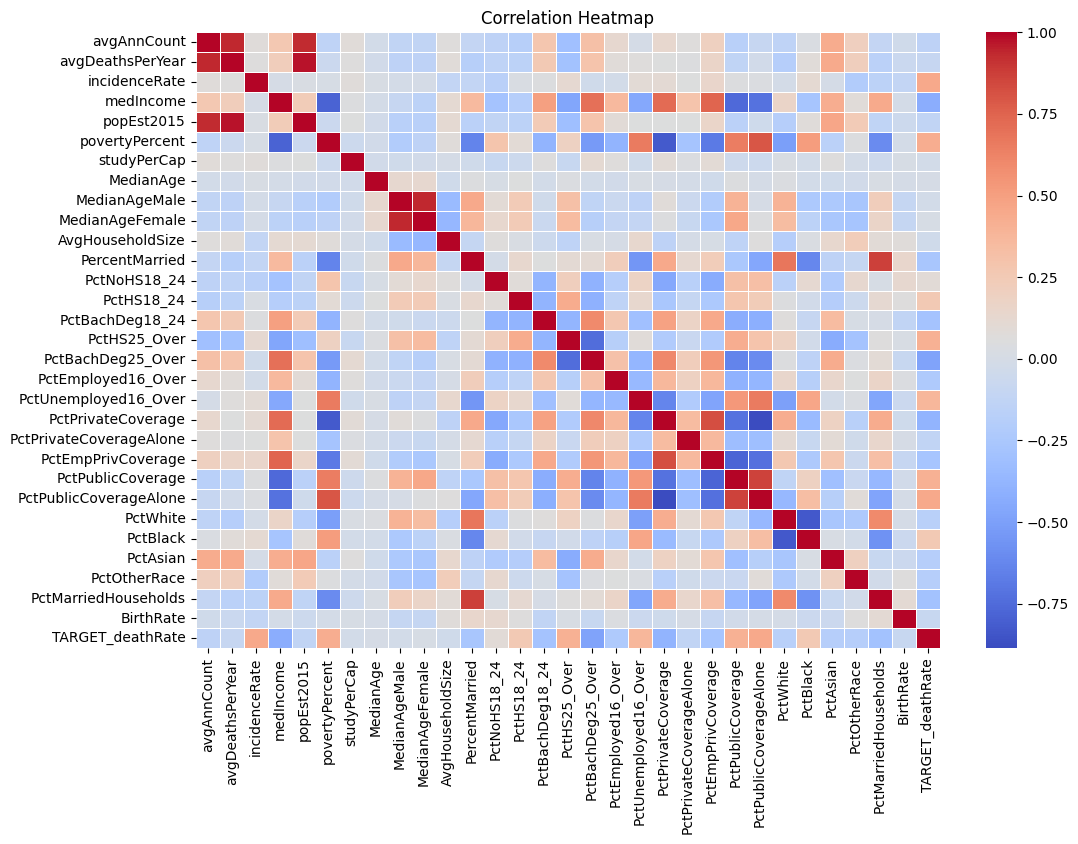

In [10]:
# Calculate correlation matrix
correlation_matrix = cleaned_df_test.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [11]:
# Find correlation of variables with TARGET_deathRate
target_correlation = correlation_matrix['TARGET_deathRate'].sort_values(ascending=False)

# Display top positively and negatively correlated features
print("Top positively correlated features:\n", target_correlation.head(10))
print("\nTop negatively correlated features:\n", target_correlation.tail(10))

Top positively correlated features:
 TARGET_deathRate          1.000000
incidenceRate             0.449432
PctPublicCoverageAlone    0.449358
povertyPercent            0.429389
PctHS25_Over              0.404589
PctPublicCoverage         0.404572
PctUnemployed16_Over      0.378412
PctHS18_24                0.261976
PctBlack                  0.257024
PctNoHS18_24              0.088463
Name: TARGET_deathRate, dtype: float64

Top negatively correlated features:
 PctAsian               -0.186331
PctOtherRace           -0.189894
PctEmployed16_Over     -0.228410
PercentMarried         -0.266820
PctEmpPrivCoverage     -0.267399
PctBachDeg18_24        -0.287817
PctMarriedHouseholds   -0.293325
PctPrivateCoverage     -0.386066
medIncome              -0.428615
PctBachDeg25_Over      -0.485477
Name: TARGET_deathRate, dtype: float64


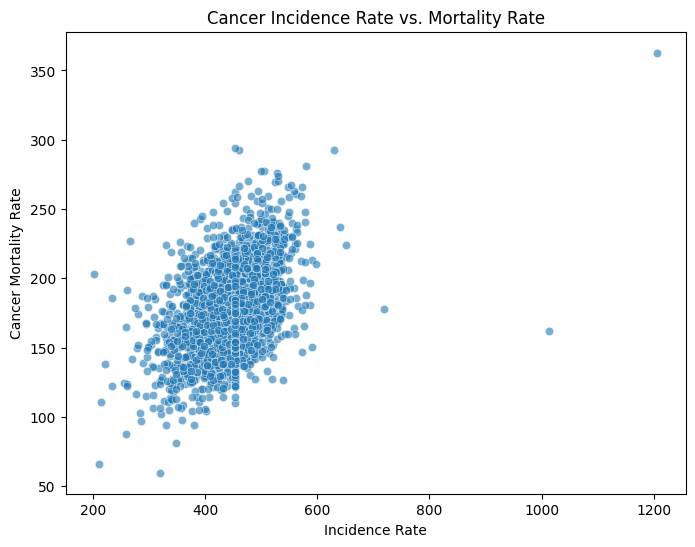

In [19]:
# Scatter plot to visualize relationship between incidence rate and cancer mortality
plt.figure(figsize=(8, 6))
sns.scatterplot(data=cleaned_df_test, x='incidenceRate', y='TARGET_deathRate', alpha=0.6)
plt.title('Cancer Incidence Rate vs. Mortality Rate')
plt.xlabel('Incidence Rate')
plt.ylabel('Cancer Mortality Rate')
plt.show()


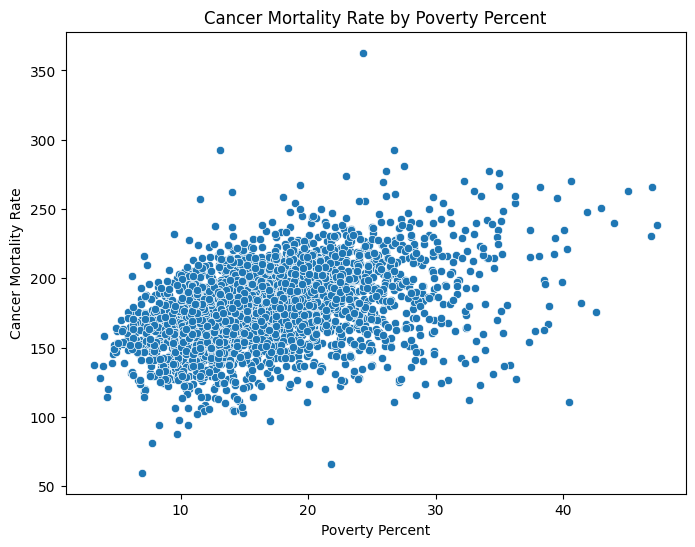

In [22]:
# Box plot to visualize income distribution against mortality rate
plt.figure(figsize=(8, 6))
sns.scatterplot(data=cleaned_df_test, x='povertyPercent', y='TARGET_deathRate')
plt.title('Cancer Mortality Rate by Poverty Percent')
plt.xlabel('Poverty Percent')
plt.ylabel('Cancer Mortality Rate')
plt.show()

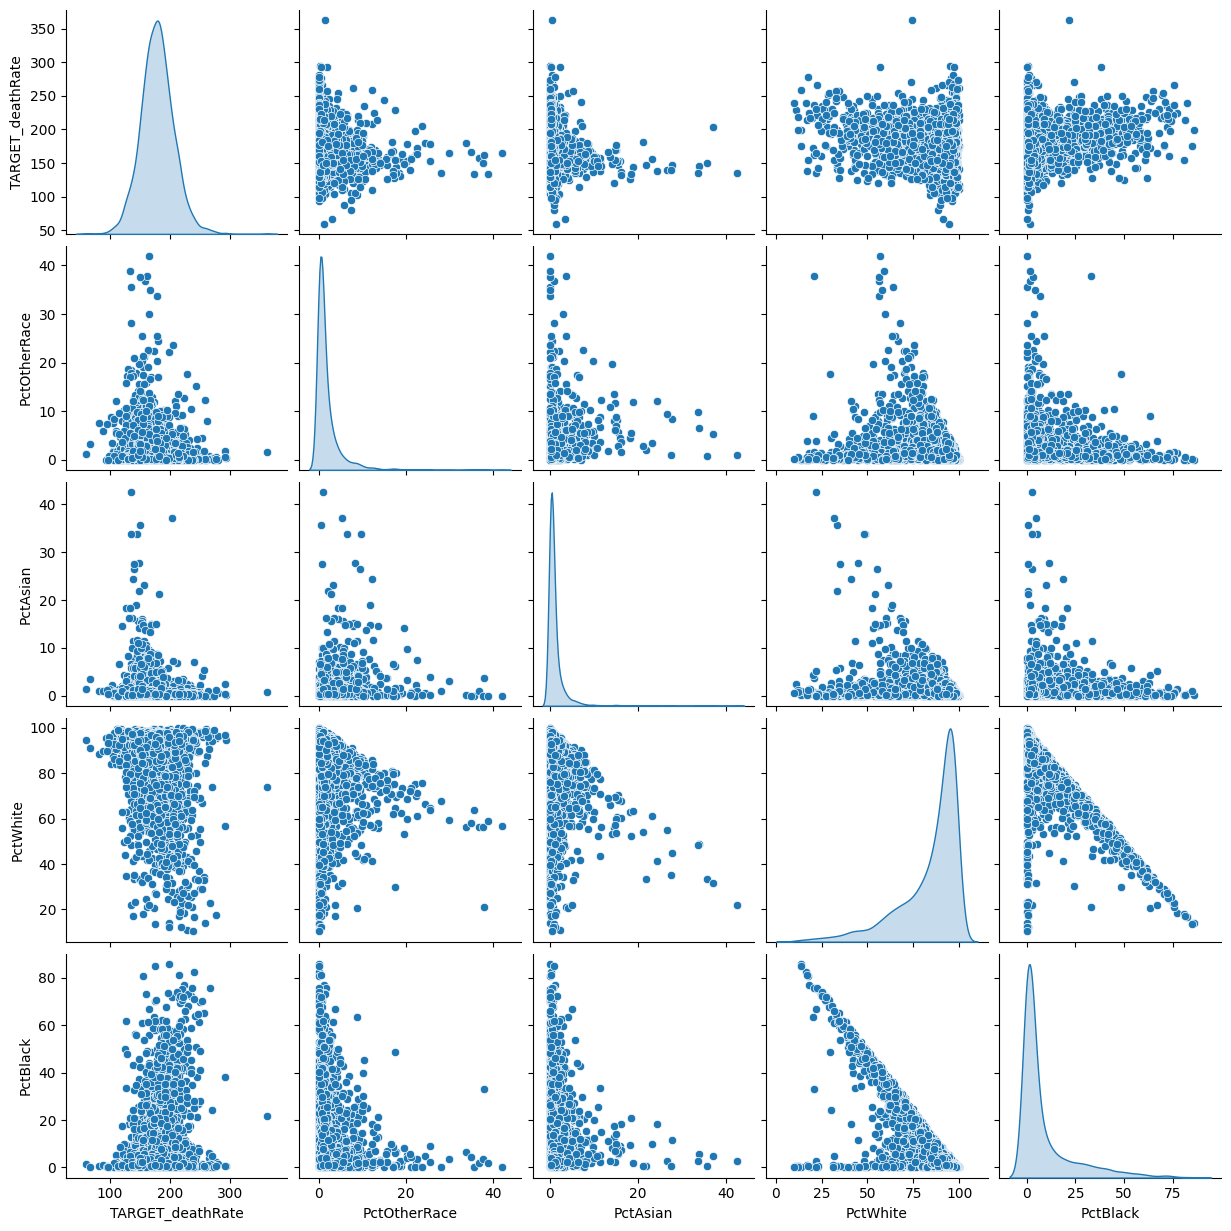

In [ ]:
# Select demographic features for visualization
selected_features = ['TARGET_deathRate', 'PctOtherRace', 'PctAsian', 'PctWhite', 'PctBlack']

# Pairplot to visualize relationships
sns.pairplot(cleaned_df_test[selected_features], diag_kind='kde')
plt.show()


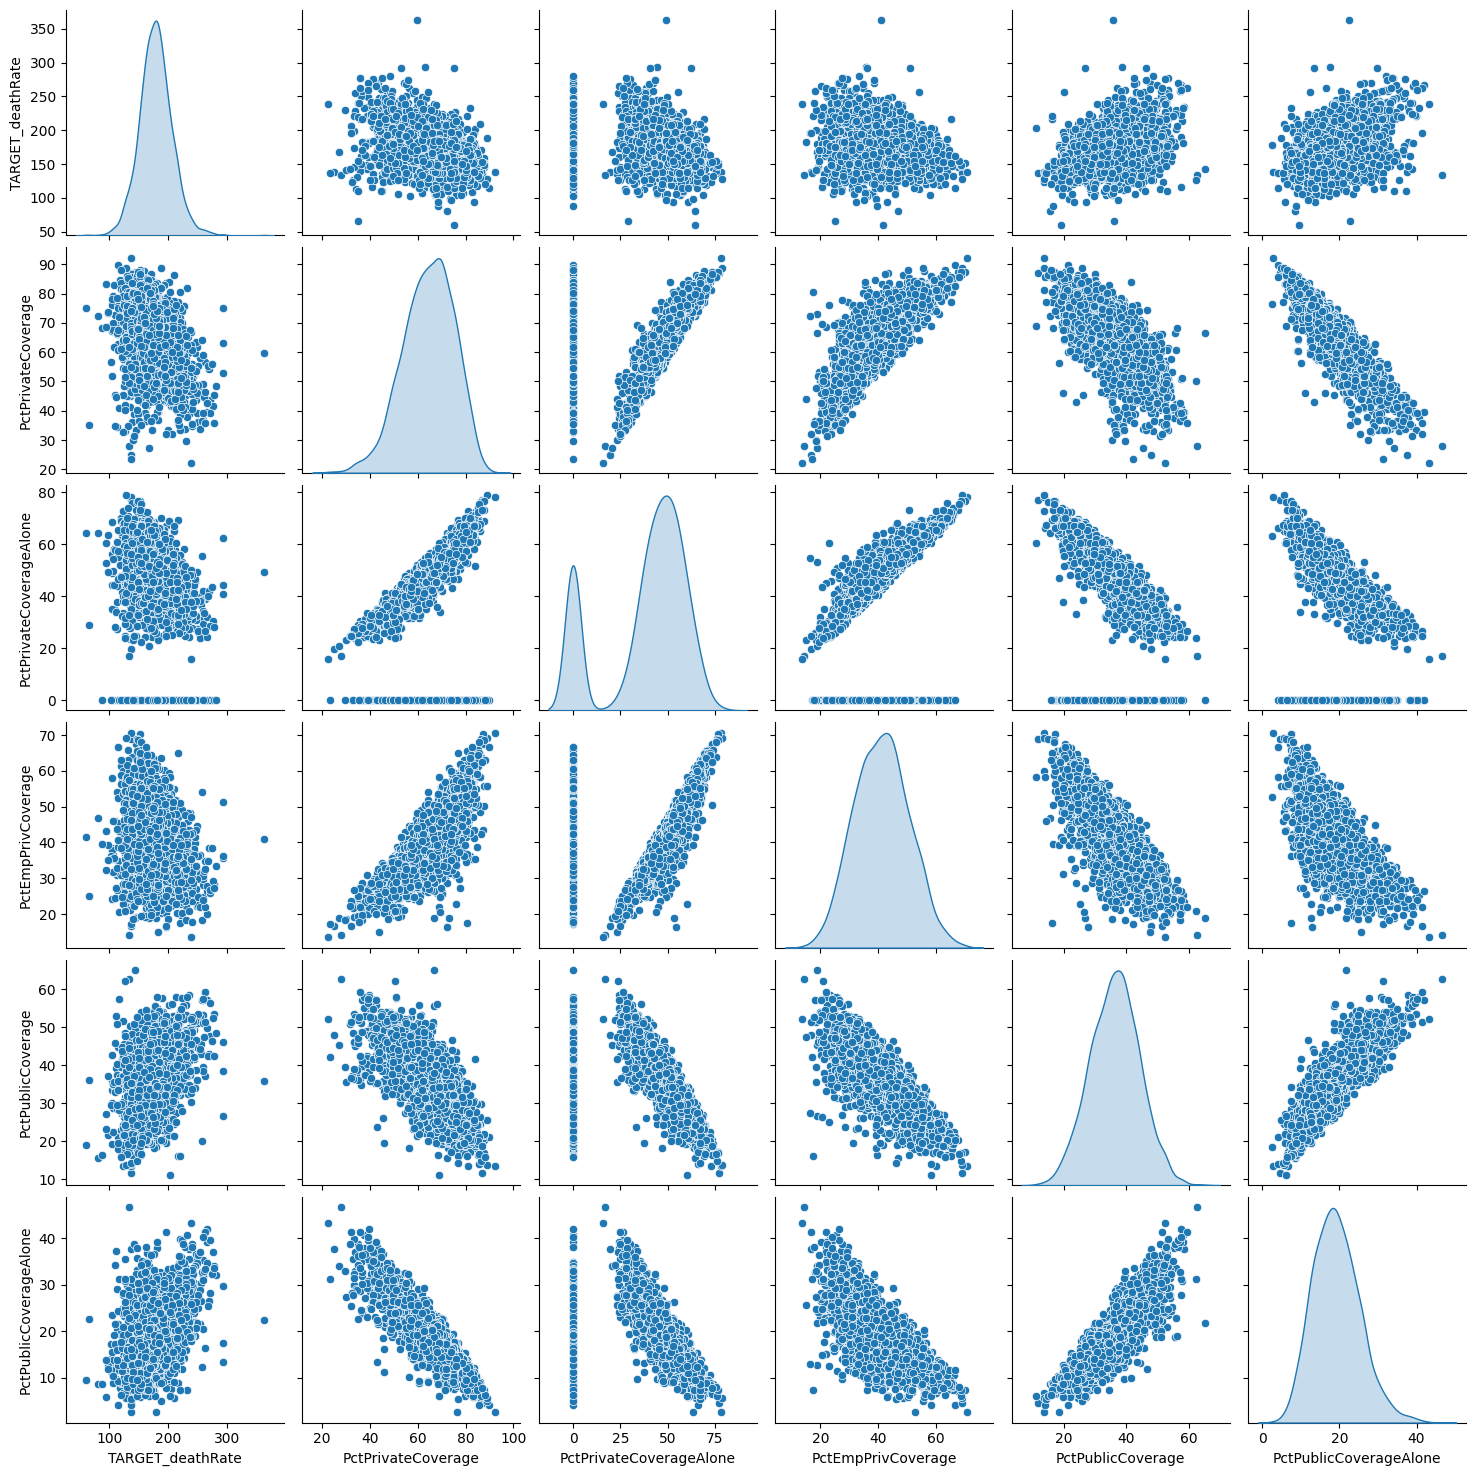

In [25]:
# Select insurance variables for visualization
selected_features = ['TARGET_deathRate', 'PctPrivateCoverage', 'PctPrivateCoverageAlone', 'PctEmpPrivCoverage'
                     , 'PctPublicCoverage', 'PctPublicCoverageAlone']

# Pairplot to visualize relationships
sns.pairplot(cleaned_df_test[selected_features], diag_kind='kde')
plt.show()

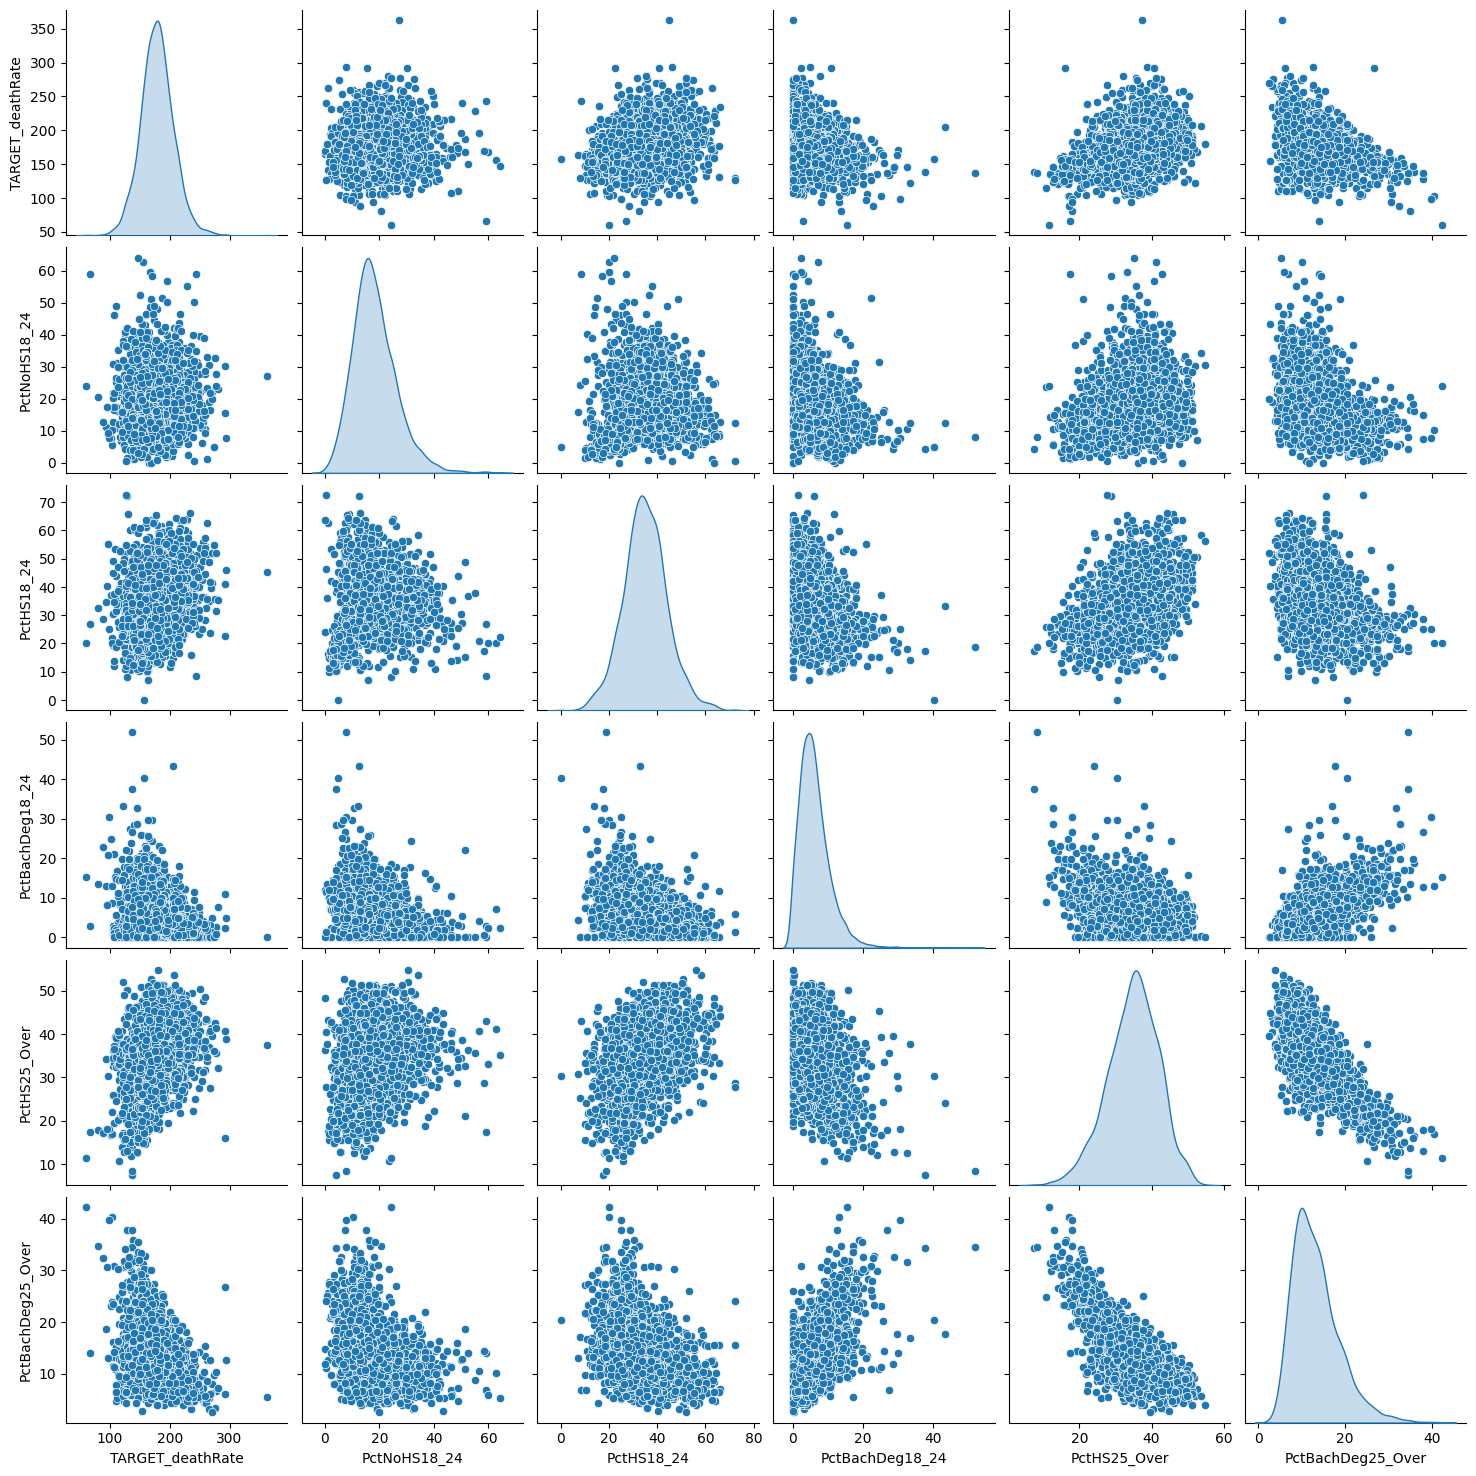

In [27]:
# Select education variables for visualization
selected_features = ['TARGET_deathRate', 'PctNoHS18_24', 'PctHS18_24'
                     , 'PctBachDeg18_24', 'PctHS25_Over', 'PctBachDeg25_Over']

# Pairplot to visualize relationships
sns.pairplot(cleaned_df_test[selected_features], diag_kind='kde')
plt.show()

In [30]:
# Find correlation of variables with avgAnnCount 
target_correlation = correlation_matrix['avgAnnCount'].sort_values(ascending=False)

# Display top positively and negatively correlated features
print("Top positively correlated features:\n", target_correlation.head(10))
print("\nTop negatively correlated features:\n", target_correlation.tail(10))

Top positively correlated features:
 avgAnnCount           1.000000
avgDeathsPerYear      0.939408
popEst2015            0.926894
PctAsian              0.435071
PctBachDeg25_Over     0.321021
PctBachDeg18_24       0.284176
medIncome             0.269145
PctOtherRace          0.209184
PctEmpPrivCoverage    0.202349
PctPrivateCoverage    0.132244
Name: avgAnnCount, dtype: float64

Top negatively correlated features:
 PctMarriedHouseholds   -0.106221
MedianAgeFemale        -0.122844
MedianAgeMale          -0.124969
povertyPercent         -0.135694
PctWhite               -0.136501
PctNoHS18_24           -0.143327
TARGET_deathRate       -0.143532
PctPublicCoverage      -0.173548
PctHS18_24             -0.182054
PctHS25_Over           -0.311375
Name: avgAnnCount, dtype: float64


In [31]:
# Find correlation of variables with incidenceRate
target_correlation = correlation_matrix['incidenceRate'].sort_values(ascending=False)

# Display top positively and negatively correlated features
print("Top positively correlated features:\n", target_correlation.head(10))
print("\nTop negatively correlated features:\n", target_correlation.tail(10))

Top positively correlated features:
 incidenceRate           1.000000
TARGET_deathRate        0.449432
PctEmpPrivCoverage      0.149825
PctHS25_Over            0.121725
PctBlack                0.113489
PctPrivateCoverage      0.105174
PctUnemployed16_Over    0.099979
studyPerCap             0.077283
avgAnnCount             0.073553
avgDeathsPerYear        0.062690
Name: incidenceRate, dtype: float64

Top negatively correlated features:
 PctWhite               -0.014510
MedianAgeMale          -0.014733
PctEmployed16_Over     -0.017190
PctBachDeg25_Over      -0.038177
BirthRate              -0.118181
AvgHouseholdSize       -0.118400
PercentMarried         -0.119524
PctMarriedHouseholds   -0.152176
PctNoHS18_24           -0.170762
PctOtherRace           -0.208748
Name: incidenceRate, dtype: float64


In [32]:
# Find correlation of variables with studyPerCap
target_correlation = correlation_matrix['studyPerCap'].sort_values(ascending=False)

# Display top positively and negatively correlated features
print("Top positively correlated features:\n", target_correlation.head(10))
print("\nTop negatively correlated features:\n", target_correlation.tail(10))

Top positively correlated features:
 studyPerCap           1.000000
PctBachDeg25_Over     0.108594
PctEmpPrivCoverage    0.100063
PctPrivateCoverage    0.092545
avgAnnCount           0.082071
incidenceRate         0.077283
PctEmployed16_Over    0.065232
PctBachDeg18_24       0.063819
avgDeathsPerYear      0.063488
PctAsian              0.062543
Name: studyPerCap, dtype: float64

Top negatively correlated features:
 PctUnemployed16_Over     -0.031957
MedianAgeMale            -0.036647
PercentMarried           -0.038143
PctPublicCoverage        -0.051497
PctMarriedHouseholds     -0.051736
PctPublicCoverageAlone   -0.055512
povertyPercent           -0.055652
PctHS18_24               -0.057035
PctHS25_Over             -0.085128
PctNoHS18_24             -0.090387
Name: studyPerCap, dtype: float64


C:\Users\david\AppData\Local\Temp\ipykernel_12740\3569542166.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=state_summary.sort_values('TARGET_deathRate', ascending=False),


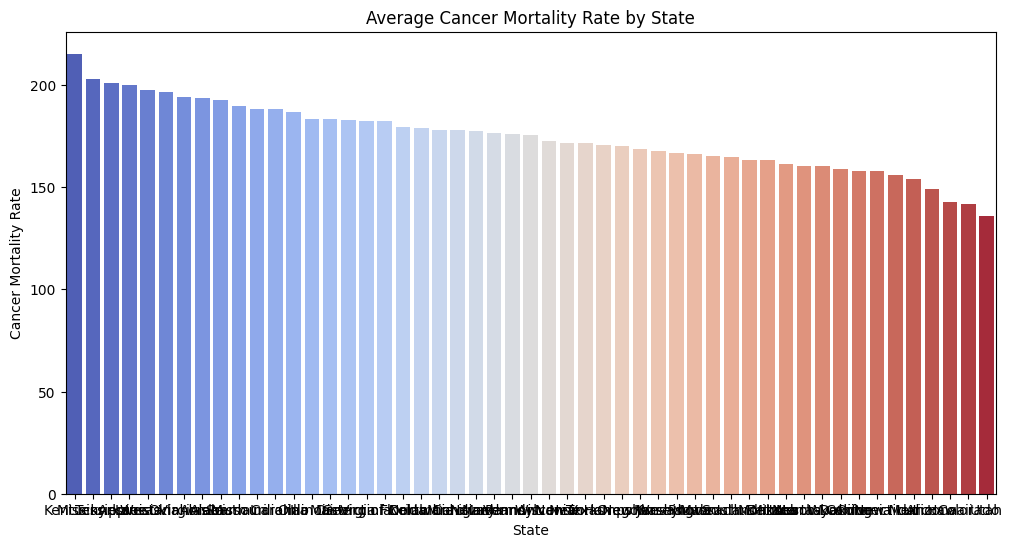

In [35]:
# Extract state from the Geography column - will aggregate to visualize data at state level
df['State'] = df['Geography'].apply(lambda x: x.split(', ')[-1] if ', ' in x else x)

# Grouping data by state and calculating mean values for key variables
state_summary = df.groupby('State').agg({
    'TARGET_deathRate': 'mean',
    'incidenceRate': 'mean',
    'povertyPercent': 'mean',
    'medIncome': 'mean',  
    'PctWhite': 'mean',
    'PctBlack': 'mean',
    'PctAsian': 'mean'
}).reset_index()



C:\Users\david\AppData\Local\Temp\ipykernel_12740\2875504453.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=state_summary.sort_values('TARGET_deathRate', ascending=False),


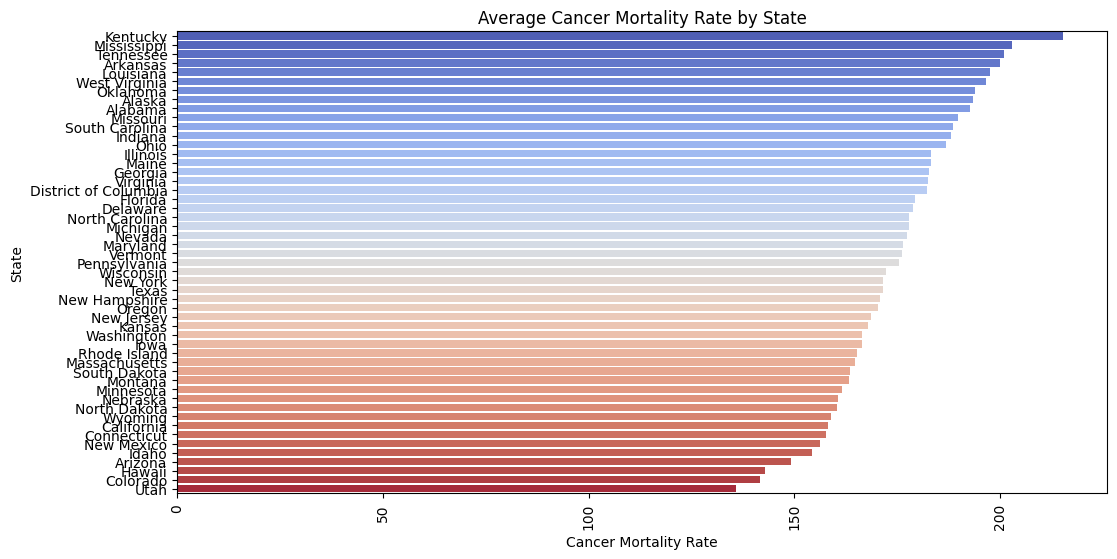

In [46]:
# Cancer Mortality Rate by State
plt.figure(figsize=(12, 6))
sns.barplot(data=state_summary.sort_values('TARGET_deathRate', ascending=False), 
            x='TARGET_deathRate', y='State', palette='coolwarm')
plt.xticks(rotation=90)
plt.title('Average Cancer Mortality Rate by State')
plt.xlabel('Cancer Mortality Rate')
plt.ylabel('State')
plt.show()


C:\Users\david\AppData\Local\Temp\ipykernel_12740\726973820.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=state_summary.sort_values('medIncome', ascending=False),


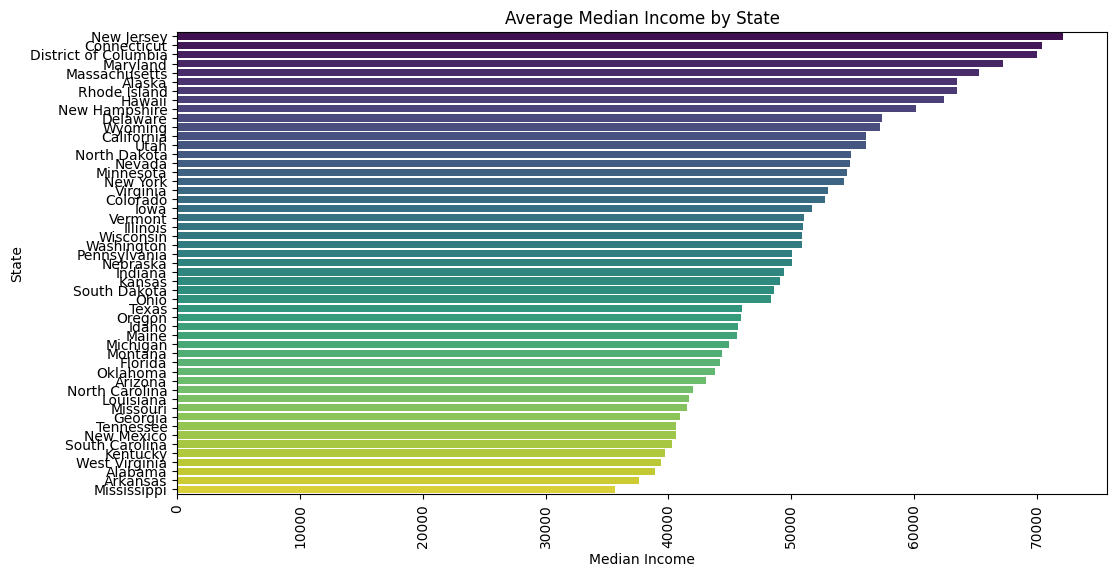

In [47]:
# Median Income by State
plt.figure(figsize=(12, 6))
sns.barplot(data=state_summary.sort_values('medIncome', ascending=False), 
            x='medIncome', y='State', palette='viridis')
plt.xticks(rotation=90)
plt.title('Average Median Income by State')
plt.xlabel('Median Income')
plt.ylabel('State')
plt.show()

### Data Cleaning

In [5]:

# Drop categorical columns (Geography and binnedInc) as they are not showing any correlation with the mortality rate
cleaned_df_test = cleaned_df_test.drop(columns=['Geography', 'binnedInc'], errors='ignore')

## Descriptive level analysis

In [6]:
from scipy.stats import ttest_ind

# Group data based on a condition, e.g., high vs. low median income
high_income = cleaned_df_test[cleaned_df_test['medIncome'] > cleaned_df_test['medIncome'].median()]['TARGET_deathRate']
low_income = cleaned_df_test[cleaned_df_test['medIncome'] <= cleaned_df_test['medIncome'].median()]['TARGET_deathRate']

# Perform T-test
t_stat, p_value = ttest_ind(high_income, low_income)
print("T Test on Income Groups (Low/High) and Mortality Rate")
print(f"T-test Statistic: {t_stat}, P-value: {p_value}")


T Test on Income Groups (Low/High) and Mortality Rate
T-test Statistic: -22.029016292552804, P-value: 6.498494455976107e-100


In [7]:
# Group data based on a condition, e.g., high vs. low median incidence rate
high_incidence = cleaned_df_test[cleaned_df_test['incidenceRate'] > cleaned_df_test['incidenceRate'].median()]['TARGET_deathRate']
low_incidence = cleaned_df_test[cleaned_df_test['incidenceRate'] <= cleaned_df_test['incidenceRate'].median()]['TARGET_deathRate']

# Perform T-test
t_stat, p_value = ttest_ind(high_incidence, low_incidence)
print("T Test on Incidence Rate Groups (Low/High) and Mortality Rate")
print(f"T-test Statistic: {t_stat}, P-value: {p_value}")

T Test on Incidence Rate Groups (Low/High) and Mortality Rate
T-test Statistic: 22.050113099215704, P-value: 4.3481567467416806e-100


In [ ]:
# Define features and target variable - features are the ones that show the highest correlation based from the EDA section

X = cleaned_df_test[['incidenceRate','PctPublicCoverageAlone', 'PctHS25_Over','PctPublicCoverage'
        ,'povertyPercent','PctUnemployed16_Over','PctHS18_24','PctBlack','PctNoHS18_24']]
X = sm.add_constant(X)  # Adds intercept term
y = cleaned_df_test['TARGET_deathRate']

# Fit the model
model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:       TARGET_deathRate   R-squared:                       0.482
Model:                            OLS   Adj. R-squared:                  0.480
Method:                 Least Squares   F-statistic:                     313.8
Date:                Mon, 20 Jan 2025   Prob (F-statistic):               0.00
Time:                        17:57:03   Log-Likelihood:                -13447.
No. Observations:                3047   AIC:                         2.691e+04
Df Residuals:                    3037   BIC:                         2.698e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     18

## Machine Learning analysis

### Dependent Variable: Target Death Date Rate
### Independent Variables or Predictors: All others

In [8]:
# Import libraries

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

### Preprocessing data
#### In this step the data is cleaned and prepared prior to model processing. Example techniques are outlier detection and treatment, encoding of numerical data, elimination of variables that do not show strong signal of correlation to the dependent variable (as shown above)

In [6]:
from sklearn.covariance import EllipticEnvelope

# Splitting features and target variable
X = cleaned_df_test.drop(columns=['TARGET_deathRate'])
y = cleaned_df_test['TARGET_deathRate']

# Take care of outliers to ensure data quality
outlier_detector = EllipticEnvelope(contamination=0.05)
outliers = outlier_detector.fit_predict(X)
X_clean = X[outliers == 1]
y_clean = y[outliers == 1]

In [9]:

# Identify numerical and categorical columns
numerical_cols = X_clean.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = X_clean.select_dtypes(include=['object']).columns

# Preprocessing pipeline
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing for both numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, test_size=0.2, random_state=42)


### Feature Engineering  

Selected Features:  Index(['avgDeathsPerYear', 'incidenceRate', 'medIncome', 'povertyPercent',
       'PctHS25_Over', 'PctBachDeg25_Over', 'PctPrivateCoverage',
       'PctPublicCoverageAlone', 'PctBlack', 'PctOtherRace'],
      dtype='object')


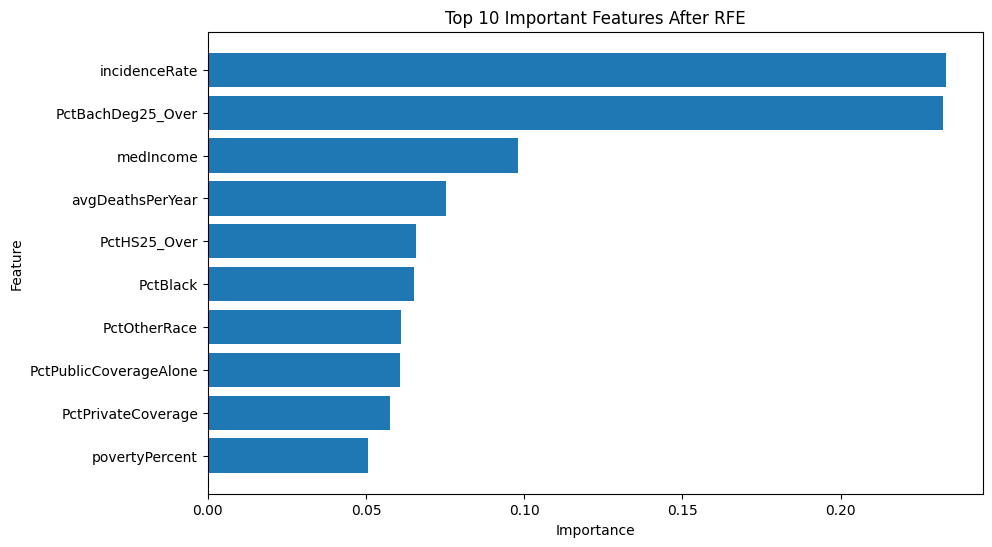

In [11]:
from sklearn.feature_selection import RFE

# Use RandomForest for RFE to select the best 10 features
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rfe = RFE(estimator=rf_model, n_features_to_select=10)
X_train_rfe = rfe.fit_transform(X_train, y_train)
X_test_rfe = rfe.transform(X_test)

# Get the selected feature names
selected_features = X_clean.columns[rfe.support_]
print("Selected Features: ", selected_features)

# Train the model with selected features
rf_model.fit(X_train_rfe, y_train)

# Visualize the top 10 selected features
feature_importance = pd.DataFrame({'Feature': selected_features, 'Importance': rf_model.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.title('Top 10 Important Features After RFE')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.gca().invert_yaxis()
plt.show()


### Model and Evaluations 
#### Practicing machine learning modeling techniques using different ensemble metholds

#### 1) Bagging

Bagging (bootstrap aggregating) is an ensemble method that involves training multiple models independently on random subsets of the data, and aggregating their predictions through voting or averaging.

In [12]:

from sklearn.ensemble import BaggingRegressor

# Define Bagging model
bagging_model = BaggingRegressor(estimator=RandomForestRegressor(), n_estimators=10, random_state=42)

# Train the model
bagging_model.fit(X_train, y_train)

# Make predictions
y_pred_bagging = bagging_model.predict(X_test)

# Evaluate model
mse_bagging = mean_squared_error(y_test, y_pred_bagging)
r2_bagging = r2_score(y_test, y_pred_bagging)

print('Training Accuracy: {:3.2f} %'.format(bagging_model.score(X_train,y_train)*100))
print('Testing Accuracy: {:3.2f} %'.format(bagging_model.score(X_test,y_test)*100))

print(f"Bagging Model Evaluation:\n MSE: {mse_bagging:.2f}\n R²: {r2_bagging:.2f}")

Training Accuracy: 83.08 %
Testing Accuracy: 58.91 %
Bagging Model Evaluation:
 MSE: 315.17
 R²: 0.59


In [13]:
# Get feature importances from the base estimators
feature_importances = np.mean([tree.feature_importances_ for tree in bagging_model.estimators_], axis=0)

# Create a DataFrame to store feature importances
feature_importance_df = pd.DataFrame({'Feature': X_clean.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Get the top 10 important features
top_10_features = feature_importance_df.head(10)
print(top_10_features)

                   Feature  Importance
2            incidenceRate    0.201639
16       PctBachDeg25_Over    0.142335
3                medIncome    0.107098
15            PctHS25_Over    0.045261
5           povertyPercent    0.043420
23  PctPublicCoverageAlone    0.040056
1         avgDeathsPerYear    0.034297
27            PctOtherRace    0.033801
25                PctBlack    0.029089
19      PctPrivateCoverage    0.024709


#### 2) Stacking (THIS METHOD TAKES A LONG TIME TO RUN)

Stacking is a strong ensemble learning strategy in machine learning that combines the predictions of numerous base models to get a final prediction with better performance. It is also known as stacked ensembles or stacked generalization

In [ ]:
# Define base models
base_models = [
    ('linear', Ridge(alpha=1.0)),  # Linear model with regularization
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('gb', GradientBoostingRegressor(n_estimators=100, random_state=42)),
    ('svm', SVR(kernel='linear'))
]

# Define stacking model with a meta-learner (e.g., Ridge regression)
stacking_model = StackingRegressor(
    estimators=base_models,
    final_estimator=LinearRegression(),  # Meta-learner
    cv=5  # 5-fold cross-validation
)

# Train the stacked model
stacking_model.fit(X_train, y_train)

# Predictions
y_pred = stacking_model.predict(X_test)

# Evaluate performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Stacking Model Evaluation:")
print('Training Accuracy: {:3.2f} %'.format(stacking_model.score(X_train,y_train)*100))
print('Testing Accuracy: {:3.2f} %'.format(stacking_model.score(X_test,y_test)*100))


In [ ]:
# Get feature importances from the meta-learner
meta_model = stacking_model.final_estimator_
feature_importances = meta_model.coef_

# Store in DataFrame
feature_importance_df = pd.DataFrame({'Feature': X_clean.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Get the top 10 important features
top_10_features = feature_importance_df.head(10)
print(top_10_features)

#### 3) Boosting 

Boosting is an ensemble learning method that combines a set of weak learners into a strong learner to minimize training errors. Boosting algorithms can improve the predictive power of your data mining initiatives

Training Accuracy: 91.80 %
Testing Accuracy: 67.44 %
XGBoost Model Evaluation:
 MSE: 249.71
 R²: 0.67


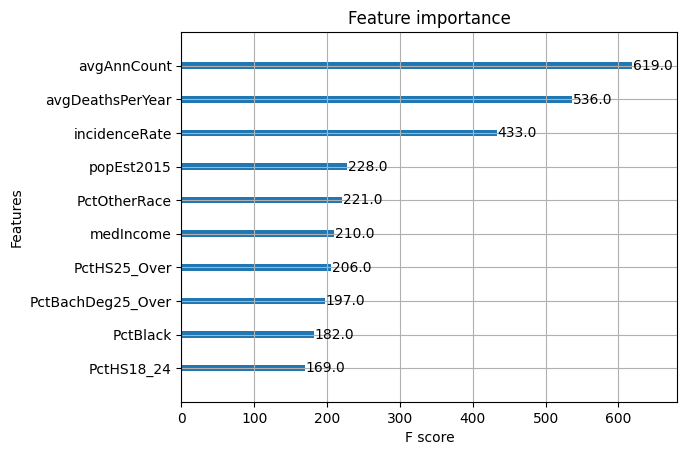

In [10]:
from xgboost import XGBRegressor
import xgboost as xgb

# Define XGBoost model
xgb_model = XGBRegressor(n_estimators=200, learning_rate=0.05, max_depth=5, random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate model
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print('Training Accuracy: {:3.2f} %'.format(xgb_model.score(X_train,y_train)*100))
print('Testing Accuracy: {:3.2f} %'.format(xgb_model.score(X_test,y_test)*100))

print(f"XGBoost Model Evaluation:\n MSE: {mse_xgb:.2f}\n R²: {r2_xgb:.2f}")

# Plot feature importance
xgb.plot_importance(xgb_model, max_num_features=10)
plt.show()



## Conclusion

The analysis conducted to evaluate various machine learning models for predicting cancer mortality rates has demonstrated that the **boosting method**, specifically the XGBoost algorithm, is the most effective approach. The model achieved a **training accuracy of 91.80%**, indicating its strong ability to learn from the training data. Furthermore, the model attained a **testing accuracy of 67.44%**, reflecting its capability to generalize to unseen data with a reasonable level of performance.

In terms of regression evaluation metrics, the XGBoost model yielded a **Mean Squared Error (MSE) of 249.71**, which suggests a relatively low average squared difference between the predicted and actual values. Additionally, the model achieved a **coefficient of determination (R²) of 0.67**, indicating that 67% of the variability in cancer mortality rates can be explained by the selected features in the model.

The results suggest that boosting methods, particularly XGBoost, offer superior predictive power compared to other ensemble techniques, likely due to their ability to minimize bias and variance by sequentially improving weak learners. The high training accuracy demonstrates the model's capacity to capture complex relationships within the data, while the moderate testing accuracy indicates the potential for further optimization to enhance generalizability.

Future work may focus on fine-tuning hyperparameters, incorporating additional relevant features, and exploring feature selection techniques to further improve the model's performance and reduce potential overfitting. Nonetheless, the current findings suggest that boosting methods are a valuable tool for identifying key risk factors and predicting cancer mortality rates with a satisfactory degree of accuracy.

